In [2]:
import pyspark as ps
import numpy as np
from pyspark.sql.types import *
import matplotlib

In [41]:
spark = (ps.sql.SparkSession.builder
        .master("local[4]")
        .appName("sparkSQL exercise")
                .getOrCreate()
                )
sc = spark.sparkContext
tweets_df = spark.read.json('data/french_tweets.json')


In [42]:
tweets_df.createOrReplaceTempView("tweets")

In [43]:
filtered = spark.sql('''
    SELECT  text, favorite_count, retweet_count, lang, created_at, coordinates, place
    FROM tweets 
    ''')
filtered.show()

#still may want to try and grab username from 

+--------------------+--------------+-------------+----+--------------------+--------------------+--------------------+
|                text|favorite_count|retweet_count|lang|          created_at|         coordinates|               place|
+--------------------+--------------+-------------+----+--------------------+--------------------+--------------------+
|Je comprends pas ...|             0|            0|  fr|Wed Apr 26 13:30:...|                null|[[[[[-0.061141, 4...|
|@julesbl99 travai...|             0|            0|  fr|Wed Apr 26 13:30:...|                null|[[[[[-1.663459, 4...|
|@lecho_fr @lasauc...|             0|            0|  fr|Wed Apr 26 13:30:...|                null|[[[[[1.427255, 48...|
|362 jours par an ...|             0|            0|  fr|Wed Apr 26 13:30:...|                null|[[[[[4.771831, 45...|
|@julia71903850 От...|             0|            0|  ru|Wed Apr 26 13:30:...|                null|[[[[[5.129335, 50...|
|La macronie En Ma...|             0|   

In [44]:
filtered_pandas = filtered.toPandas()
filtered_pandas[:30]

,text,favorite_count,retweet_count,lang,created_at,coordinates,place
0,Je comprends pas trop la fin de 13 reasons why 😓,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-0.061141, 49.208997], [-0.061141, 49.250..."
1,@julesbl99 travailles au lieu de raconter ta vie,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-1.663459, 47.239088], [-1.663459, 47.309..."
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[1.427255, 48.421392], [1.427255, 48.44602..."
3,"362 jours par an je suis adorable, aujourd'hui...",0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[4.771831, 45.707363], [4.771831, 45.80828..."
4,@julia71903850 Отличная реклама!,0.0,0.0,ru,Wed Apr 26 13:30:47 +0000 2017,None,"(([[[5.129335, 50.467429], [5.129335, 50.53889..."
5,La macronie En Marche ! commence déjà à s'écha...,0.0,0.0,fr,Wed Apr 26 13:30:47 +0000 2017,None,"(([[[5.781315, 43.718485], [5.781315, 43.80743..."
6,#AllEyezOnIt #Neochrome #Eriah #Loin #Youtube ...,0.0,0.0,und,Wed Apr 26 13:30:47 +0000 2017,"([2.42839066, 48.89007918], Point)","(([[[2.423926, 48.871319], [2.423926, 48.89841..."
7,#RNCMobile 8545:21 captée https://t.co/tHXf3Gh...,0.0,0.0,fr,Wed Apr 26 13:30:48 +0000 2017,None,"(([[[2.224101, 48.815521], [2.224101, 48.90214..."
8,@lxcasjkr @Pearja_ Ca Fait 3 fois je replay je...,0.0,0.0,fr,Wed Apr 26 13:30:48 +0000 2017,None,"(([[[2.247633, 48.912738], [2.247633, 48.95105..."
9,@1001portails Mais ou va ce monde! : Un robot ...,0.0,0.0,fr,Wed Apr 26 13:30:49 +0000 2017,None,"(([[[2.53321, 44.340681], [2.53321, 44.377798]..."


In [46]:
city = filtered_pandas['place'][1][3]
city

'Orvault, France'

In [47]:
city = filtered_pandas['place'].str[3]
city

0                        Dozulé, France
1                       Orvault, France
2                          Lucé, France
3                          Lyon, France
4                         Huy, Belgique
                      ...              
214931                  Meythet, France
214932    Saint-Germain-en-Laye, France
214933                 Toulouse, France
214934                    Paris, France
214935                   Ennery, France
Name: place, Length: 214936, dtype: object

In [48]:
filtered_pandas['city'] = filtered_pandas['place'].str[3]
filtered_pandas.head()

,text,favorite_count,retweet_count,lang,created_at,coordinates,place,city
0,Je comprends pas trop la fin de 13 reasons why 😓,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-0.061141, 49.208997], [-0.061141, 49.250...","Dozulé, France"
1,@julesbl99 travailles au lieu de raconter ta vie,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-1.663459, 47.239088], [-1.663459, 47.309...","Orvault, France"
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[1.427255, 48.421392], [1.427255, 48.44602...","Lucé, France"
3,"362 jours par an je suis adorable, aujourd'hui...",0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[4.771831, 45.707363], [4.771831, 45.80828...","Lyon, France"
4,@julia71903850 Отличная реклама!,0.0,0.0,ru,Wed Apr 26 13:30:47 +0000 2017,None,"(([[[5.129335, 50.467429], [5.129335, 50.53889...","Huy, Belgique"


In [49]:
cities = filtered_pandas[filtered_pandas['city']!='France']
cities

,text,favorite_count,retweet_count,lang,created_at,coordinates,place,city
0,Je comprends pas trop la fin de 13 reasons why 😓,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-0.061141, 49.208997], [-0.061141, 49.250...","Dozulé, France"
1,@julesbl99 travailles au lieu de raconter ta vie,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-1.663459, 47.239088], [-1.663459, 47.309...","Orvault, France"
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[1.427255, 48.421392], [1.427255, 48.44602...","Lucé, France"
3,"362 jours par an je suis adorable, aujourd'hui...",0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[4.771831, 45.707363], [4.771831, 45.80828...","Lyon, France"
4,@julia71903850 Отличная реклама!,0.0,0.0,ru,Wed Apr 26 13:30:47 +0000 2017,None,"(([[[5.129335, 50.467429], [5.129335, 50.53889...","Huy, Belgique"
...,...,...,...,...,...,...,...,...
214931,@TheRealGuigz Mdrr pire sensation de la vie,0.0,0.0,fr,Sat Apr 29 05:01:53 +0000 2017,None,"(([[[6.083401, 45.90748], [6.083401, 45.930719...","Meythet, France"
214932,AUBRY DELANOE MADELIN HUE SARKHOSI BAYROU FI...,0.0,0.0,fr,Sat Apr 29 05:01:53 +0000 2017,None,"(([[[2.039703, 48.883906], [2.039703, 48.98729...","Saint-Germain-en-Laye, France"
214933,Go Japan!!! https://t.co/lW3q1VFTS8,0.0,0.0,tl,Sat Apr 29 05:01:54 +0000 2017,None,"(([[[1.350425, 43.53284], [1.350425, 43.668674...","Toulouse, France"
214934,happy birthday @tsugimag 🎂 #10ans @laurentgarn...,0.0,0.0,en,Sat Apr 29 05:01:54 +0000 2017,"([2.393893, 48.892578], Point)","(([[[2.224101, 48.815521], [2.224101, 48.90214...","Paris, France"


In [50]:
filtered_pandas['city'] = filtered_pandas['place'].str[3]
filtered_pandas.head()

,text,favorite_count,retweet_count,lang,created_at,coordinates,place,city
0,Je comprends pas trop la fin de 13 reasons why 😓,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-0.061141, 49.208997], [-0.061141, 49.250...","Dozulé, France"
1,@julesbl99 travailles au lieu de raconter ta vie,0.0,0.0,fr,Wed Apr 26 13:30:45 +0000 2017,None,"(([[[-1.663459, 47.239088], [-1.663459, 47.309...","Orvault, France"
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[1.427255, 48.421392], [1.427255, 48.44602...","Lucé, France"
3,"362 jours par an je suis adorable, aujourd'hui...",0.0,0.0,fr,Wed Apr 26 13:30:46 +0000 2017,None,"(([[[4.771831, 45.707363], [4.771831, 45.80828...","Lyon, France"
4,@julia71903850 Отличная реклама!,0.0,0.0,ru,Wed Apr 26 13:30:47 +0000 2017,None,"(([[[5.129335, 50.467429], [5.129335, 50.53889...","Huy, Belgique"


In [51]:
cities['city'][1].split(",")

['Orvault', ' France']

In [73]:
grouped_cities = cities.groupby('city').count()
most_tweets = grouped_cities.sort_values('place', ascending=False).reset_index(drop=False)

top_fifty = most_tweets[:25]
top_fifty

,city,text,favorite_count,retweet_count,lang,created_at,coordinates,place
0,"Paris, France",33074,33074,33074,33074,33074,4931,33074
1,"South East, England",9481,9481,9481,9481,9481,1051,9481
2,"South West, England",5851,5851,5851,5851,5851,851,5851
3,"Lyon, France",4626,4626,4626,4626,4626,368,4626
4,Deutschland,3607,3607,3607,3607,3607,0,3607
5,"Toulouse, France",3320,3320,3320,3320,3320,276,3320
6,"Bordeaux, France",3078,3078,3078,3078,3078,255,3078
7,"Ile-de-France, France",2234,2234,2234,2234,2234,1,2234
8,"Lille, France",2159,2159,2159,2159,2159,160,2159
9,"Nantes, France",2067,2067,2067,2067,2067,163,2067


In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # I also like fivethirtyeight'
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'sans'})

<ipython-input-78-1d840082f400>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_fifty['city'])


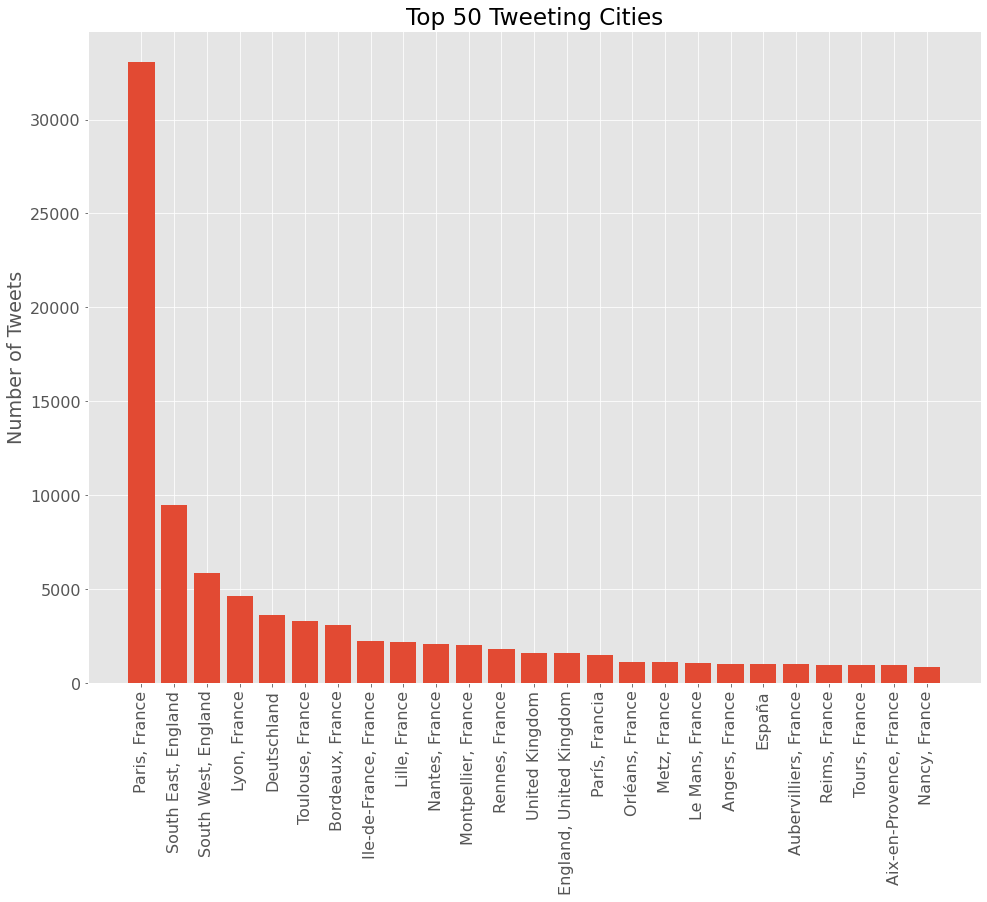

In [78]:
fig, ax = plt.subplots(figsize=(16,12), tight_layout=true)


ax.bar(top_fifty['city'], top_fifty['text'])
ax.set_title('Top 50 Tweeting Cities')
ax.set_ylabel('Number of Tweets')
ax.set_xticklabels(top_fifty['city'])
fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=90); #, ha="right") #,  # setp --> set preferences;
plt.savefig('top_tweeting_cities.png')

AttributeError: 'Nominatim' object has no attribute 'query_community_name'